In [1]:
%run ../__init__.py
%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Test annotations

In [2]:
# from source.datasets.hpatches.preprocessing.annotations import create_pairs_annotations

# dataset_root = "/mnt/sda/datasets/HPatches"

# exclude_scenes = ['i_contruction', 'i_crownnight', 'i_dc', 'i_pencils', 
#                   'i_whitebuilding', 'v_artisans', 'v_astronautis', 'v_talent']

# create_pairs_annotations(dataset_root, 'test', exclude_scenes=exclude_scenes)

In [4]:
# from source.datasets.hpatches.preprocessing.annotations import create_annotations

# create_annotations(dataset_root, 'test', exclude_scenes=exclude_scenes)

## Validation annotations

In [8]:
# from source.datasets.hpatches.preprocessing.annotations import create_pairs_annotations

# dataset_root = "/mnt/sda/datasets/HPatches"

# include_scenes = ['i_contruction', 'i_crownnight', 'i_dc', 'i_pencils', 
#                   'i_whitebuilding', 'v_artisans', 'v_astronautis', 'v_talent']

# create_pairs_annotations(dataset_root, 'val', include_scenes=include_scenes)

In [9]:
# create_annotations(dataset_root, 'val', include_scenes=include_scenes)

## Pairs

In [6]:
from omegaconf import OmegaConf

from source.datasets.base.transforms import ImageHCalibTFactory
from source.datasets.hpatches.dataset import HPatchesDataset
from torch.utils.data.dataloader import DataLoader

s = """
    csv_path: "/mnt/sda/datasets/HPatches/val_pairs.csv"
    data_options:
      - 'image'
      - 'h'
    
    transforms:
      grayscale:
      
      resize:      
        width: -1
        height: -1
        
      crop1:
        type: 'divisor_crop'
"""

dataset_config = OmegaConf.create(s)

item_transforms = ImageHCalibTFactory(dataset_config.transforms, 16).create()
dataset = HPatchesDataset.from_config(dataset_config, item_transforms)
loader = DataLoader(dataset, 1)

_iter = loader.__iter__()

In [7]:
item = next(_iter)

In [8]:
image1 = item[du.IMAGE1]
image2 = item[du.IMAGE2]

In [9]:
from source.datasets.base.utils import HDataWrapper
from source.projective.warp import warp_image

hdata = HDataWrapper().init_from_batch(item, torch.device('cpu'))

w_image1 = warp_image(image1, hdata, 'i')
w_image2 = warp_image(image2, hdata.swap(), 'i')

/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:4004: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


In [10]:
cv_image1 = torch2cv(image1[0])
cv_image2 = torch2cv(image2[0])

cv_w_image1 = torch2cv(w_image1[0])
cv_w_image2 = torch2cv(w_image2[0])

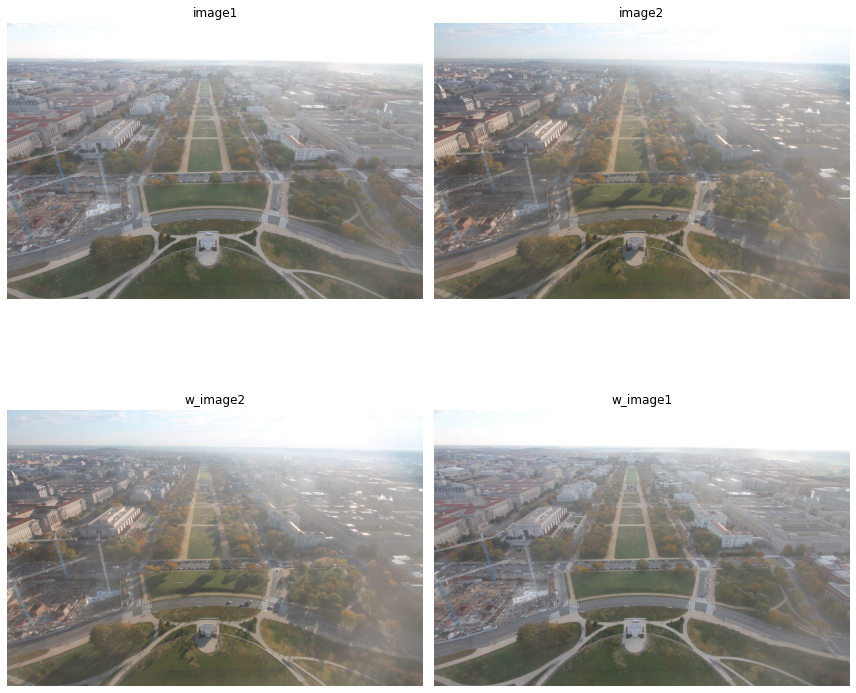

In [11]:
plot_figures({'image1': cv_image1, 'image2': cv_image2,
              'w_image2': cv_w_image2, 'w_image1': cv_w_image1,
             }, 2, 2, (12, 12))

## Single

In [12]:
from omegaconf import OmegaConf

from source.datasets.base.transforms import ImageHCalibTFactory
from source.datasets.hpatches.dataset import HPatchesDataset
from torch.utils.data.dataloader import DataLoader

s = """
    csv_path: "/mnt/sda/datasets/HPatches/test.csv"
    data_options:
      - 'image'
    
    transforms:
      grayscale:
      
      resize:      
        width: -1
        height: -1
        
      crop1:
        type: 'divisor_crop'
"""

dataset_config = OmegaConf.create(s)

item_transforms = ImageHCalibTFactory(dataset_config.transforms, 16).create()
dataset = HPatchesDataset.from_config(dataset_config, item_transforms)
loader = DataLoader(dataset, 1)

_iter = loader.__iter__()

In [13]:
item = next(_iter)

In [14]:
image1 = item[du.IMAGE1]

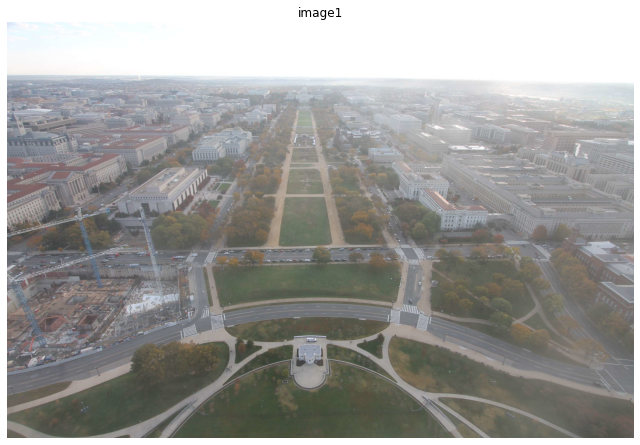

In [15]:
plot_figures({'image1': cv_image1}, 1, 1, (9, 9))